In [1]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# import data
productDF = pd.read_csv('../data/lazada/clean/product.csv')
reviewDF = pd.read_csv('../data/lazada/clean/review.csv')

In [3]:
# check data points
print('total review of {:,}'.format(reviewDF.shape[0]))
print('total product of {:,}'.format(len(reviewDF['sku'].unique())))

# avg review
avgReview = reviewDF[['sku', 'rating']].groupby('sku').count()
print( \
      'mean/median/mode review per product of ({:,.2f}/{:,.2f}/{:,.2f})' \
      .format(
          avgReview.mean().values[0],
          avgReview.median().values[0],
          avgReview.mode().values[0][0]
      )
)

total review of 71,435
total product of 4,062
mean/median/mode review per product of (17.59/8.00/3.00)


In [4]:
# expensive!!!
uMatrix = reviewDF.pivot(index='user_fk', columns='sku', values='rating')
uMatrix.shape

(60252, 4062)

In [5]:
# expensive!!!
uMatrix.fillna(0, inplace=True)

In [6]:
# explore utility matrix
uMatrix.head()

sku,1C799ELAA7L67SANTH,1C799ELAA7L6IAANTH,3C812HBAA6PVESANTH,3C812HBAA6PVF2ANTH,3C812HBAA7K2SDANTH,3C812HBAA7K2TQANTH,3C812HBAA7KJY0ANTH,3C812HBAANM2NCANTH,7F891ELAA63Q6XANTH,9F124ELAA20U8VANTH,...,ZI579HBAQR43ANTH,ZN408FAAA4ZVLMANTH,ZO544OTAADTY1IANTH,ZS364ELAA4NJVEANTH,ZS364ELAA65EMAANTH,ZT087ELAA7YP9VANTH,ZT087ELAAOJ9VAANTH,ZT440ELAA4Q4HOANTH,ZU155FAAA5Y1V7ANTH,ZU268ELAAAEZY9ANTH
user_fk,,,,,,,,,,,,,,,,,,,,,
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# reduce dimension
svd = TruncatedSVD(n_components=100)
svd.fit(uMatrix.values)

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
       random_state=None, tol=0.0)

In [8]:
svd.components_.shape

(100, 4062)

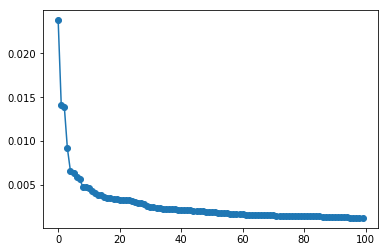

In [9]:
# dimension significance
plt.plot(svd.explained_variance_ratio_, '-o')

In [10]:
# create correlation dataframe in lower dimension
lowDimUMatrix = pd.DataFrame(svd.components_, columns=uMatrix.columns)
corrDF = lowDimUMatrix.corr()
corrDF.head()

sku,1C799ELAA7L67SANTH,1C799ELAA7L6IAANTH,3C812HBAA6PVESANTH,3C812HBAA6PVF2ANTH,3C812HBAA7K2SDANTH,3C812HBAA7K2TQANTH,3C812HBAA7KJY0ANTH,3C812HBAANM2NCANTH,7F891ELAA63Q6XANTH,9F124ELAA20U8VANTH,...,ZI579HBAQR43ANTH,ZN408FAAA4ZVLMANTH,ZO544OTAADTY1IANTH,ZS364ELAA4NJVEANTH,ZS364ELAA65EMAANTH,ZT087ELAA7YP9VANTH,ZT087ELAAOJ9VAANTH,ZT440ELAA4Q4HOANTH,ZU155FAAA5Y1V7ANTH,ZU268ELAAAEZY9ANTH
sku,,,,,,,,,,,,,,,,,,,,,
1C799ELAA7L67SANTH,1.000000,0.040400,0.023727,-0.117644,0.023616,-0.162400,0.043043,0.224043,-0.301381,0.012309,...,-0.052944,0.009324,-0.086436,-0.062035,-0.131557,0.027609,-0.022067,0.050414,-0.053213,0.072862
1C799ELAA7L6IAANTH,0.040400,1.000000,0.034314,-0.087963,-0.008519,0.013236,0.152293,0.115214,0.318167,-0.021118,...,0.001291,-0.046959,0.107530,-0.005760,0.063981,0.000953,0.163768,-0.074126,-0.022643,0.057717
3C812HBAA6PVESANTH,0.023727,0.034314,1.000000,-0.106077,-0.057666,-0.010369,-0.111318,0.008620,-0.015826,-0.057369,...,-0.004125,-0.017020,-0.016724,-0.010588,-0.055516,-0.015231,-0.043743,-0.001202,-0.016237,0.007154
3C812HBAA6PVF2ANTH,-0.117644,-0.087963,-0.106077,1.000000,-0.041906,-0.033126,0.006660,0.024916,0.002425,-0.079762,...,-0.024565,0.010213,0.004129,-0.053485,0.111570,-0.005485,0.017595,-0.078480,0.014797,-0.023502
3C812HBAA7K2SDANTH,0.023616,-0.008519,-0.057666,-0.041906,1.000000,-0.116388,0.012909,-0.103364,0.059258,-0.020822,...,-0.051367,0.045724,0.061764,0.065426,0.176155,-0.060696,-0.037175,0.041253,-0.092655,0.041806


In [23]:
# sample sku
currentItem = np.random.choice(productDF['sku'].unique())
# currentItem = 'IN309ELBAER4ANTH'

# lookup
predictItem = corrDF[currentItem] \
    .sort_values(ascending=False) \
    .reset_index()
predictItem = predictItem.merge(productDF[['sku', 'name']], on='sku')
predictItem.head(10)

,sku,UN355FAAA6XOB0ANTH,name
0,UN355FAAA6XOB0ANTH,1.000000,Grandwish Women Cartoon Print Jackets Baseball...
1,ME937FAAA3YYGTANTH,0.982057,New New 4744 เสื้อเเขนยาวปักลายน้องแมว มุ้งมิ้ง
2,ME937FAAA2S8K3ANTH,0.981440,New New 9386 Top Shirt คอจีนลายตรง ( สีเทา )
3,ME937FAAA8940PANTH,0.977360,New New 9376 เสื้อไหมพรม แบบใหม่ งานสวยๆ
4,ME937FAAA86QYUANTH,0.965752,New New K06 Top คอจีน เรียบหรู ดีเทลแขนผ้าลูกไม้
5,ME937FAAA441SYANTH,0.964943,New New 9338 กางเกงขาสั้นเอวสูง เเต่งซิบเนื้อผ...
6,ME937FAAA6DKK1ANTH,0.957844,New New 4521เสื้อคลุมไหมพรมตัวยาว ตกเเต่งกระดุ...
7,ME937FAAADPYDQANTH,0.954609,New New 5055 Top คอกลมแขนยาว ลายฉลุลูกไม้ สวยเ...
8,ME937FAAA893X6ANTH,0.952919,New New 1903 เสื้อไหมพรมยืด ลายริ้ว
9,NE802FAAAM0GNQANTH,0.951911,New New K11 Shirt Dress ผ้าลูกฟูกลายริ้วเส้นคู...


In [20]:
svd.explained_variance_ratio_.sum()

0.28278815152372044

In [13]:
svd.singular_values_

array([ 171.4123322 ,  131.7407335 ,  129.34407982,  105.39501857,
         89.11055374,   88.09285803,   84.56055214,   82.39655634,
         76.23101806,   75.40751033,   75.14020417,   72.20220365,
         69.91339479,   68.58956026,   68.23573013,   65.69743718,
         65.52057557,   64.68930316,   64.2278753 ,   63.52588399,
         63.20212267,   63.1077833 ,   62.83463668,   62.63168929,
         61.68572802,   60.9850042 ,   59.42171258,   58.94259086,
         58.59020483,   55.53140023,   54.71229214,   54.22506039,
         53.80878935,   53.00672254,   52.57517239,   52.51533145,
         52.4497128 ,   51.74614784,   51.71612223,   51.16732423,
         51.15084046,   51.12167115,   50.86382597,   50.72855683,
         49.94818492,   49.38584893,   49.35648201,   49.33103973,
         48.35901472,   47.8092204 ,   47.52013126,   47.35045713,
         47.1954282 ,   46.43231565,   46.29566051,   45.94813454,
         45.69322183,   45.41630027,   44.78420791,   44.44006

In [14]:
svd.explained_variance_

array([ 0.47413897,  0.28150285,  0.27734506,  0.18280756,  0.13067452,
        0.12790787,  0.11801903,  0.11218696,  0.09598117,  0.09396457,
        0.09321527,  0.08604321,  0.08069825,  0.07784071,  0.07674141,
        0.07141114,  0.07079231,  0.06918769,  0.06843604,  0.06678701,
        0.0659808 ,  0.066043  ,  0.06531005,  0.06509123,  0.06295054,
        0.0616034 ,  0.0584198 ,  0.0574947 ,  0.05693318,  0.05103869,
        0.04956759,  0.04868677,  0.04795841,  0.04654286,  0.04562763,
        0.04570384,  0.04553939,  0.04439091,  0.0440977 ,  0.04344856,
        0.04331228,  0.04324621,  0.04285162,  0.04265863,  0.04130238,
        0.04039343,  0.04042507,  0.04035974,  0.03871019,  0.03785422,
        0.0374759 ,  0.03709062,  0.03696818,  0.03577355,  0.0355357 ,
        0.03500824,  0.03454035,  0.03416411,  0.03327369,  0.0326574 ,
        0.0326745 ,  0.03230099,  0.03166197,  0.03175712,  0.03139419,
        0.03133344,  0.03096323,  0.03074825,  0.03034335,  0.03